In [1]:
#importdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Import Libraries**

In [22]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import string
import seaborn as sns
import math

import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Nadam, RMSprop

## **Load the dataset**

In [3]:
uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(filename)
df

Saving Part1_house_price.csv to Part1_house_price (2).csv


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### **Check Duplicates**

In [4]:
df.duplicated(subset='id').sum()

177

In [5]:
duplicated_rows = df[df.duplicated(subset=['id'], keep=False)]
duplicated_rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,20140725T000000,430000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,20140618T000000,1380000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,20140905T000000,232000.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,20150330T000000,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20779,6300000226,20140626T000000,240000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
20780,6300000226,20150504T000000,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
21580,7853420110,20141003T000000,594866.0,3,3.00,2780,6000,2.0,0,0,...,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


In [6]:
## Remove duplicates from the dataset
duplicates = df.duplicated(subset=['id'], keep='last')
df = df[~duplicates]
df = df.reset_index()
df = df.drop(columns = 'index')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21431,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21432,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21433,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21434,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Here, we have removed the duplicates by keeping the latest data record



In [7]:
df.duplicated(subset='id').sum()

0

### **Missing values**

In [8]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No missing values in this dataset

### **Variable Conversions**



*   Remove 'yr_renovated' column from the dataset and create a new variable called 'is_renovated' using the 'yr_renovated' variable
*   'yr_renovated' variable indicates whether there any renovation happened in a certain house in any year



In [9]:
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

### **Remove Unwanted Variables**

In [10]:
df = df.drop(columns = ['id' , 'date' , 'zipcode' , 'lat' , 'long' , 'yr_renovated'])
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,is_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21431,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,1530,1509,0
21432,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,1830,7200,0
21433,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,1020,2007,0
21434,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,1410,1287,0


### **Rearrange column names in order**

In [11]:
df = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15',
       'is_renovated', 'price']]
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,is_renovated,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650,0,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639,1,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2720,8062,0,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000,0,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1800,7503,0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21431,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,1530,1509,0,360000.0
21432,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,1830,7200,0,400000.0
21433,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,1020,2007,0,402101.0
21434,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,1410,1287,0,400000.0


In [12]:
df.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
sqft_living15      int64
sqft_lot15         int64
is_renovated       int64
price            float64
dtype: object

## **Visualization**

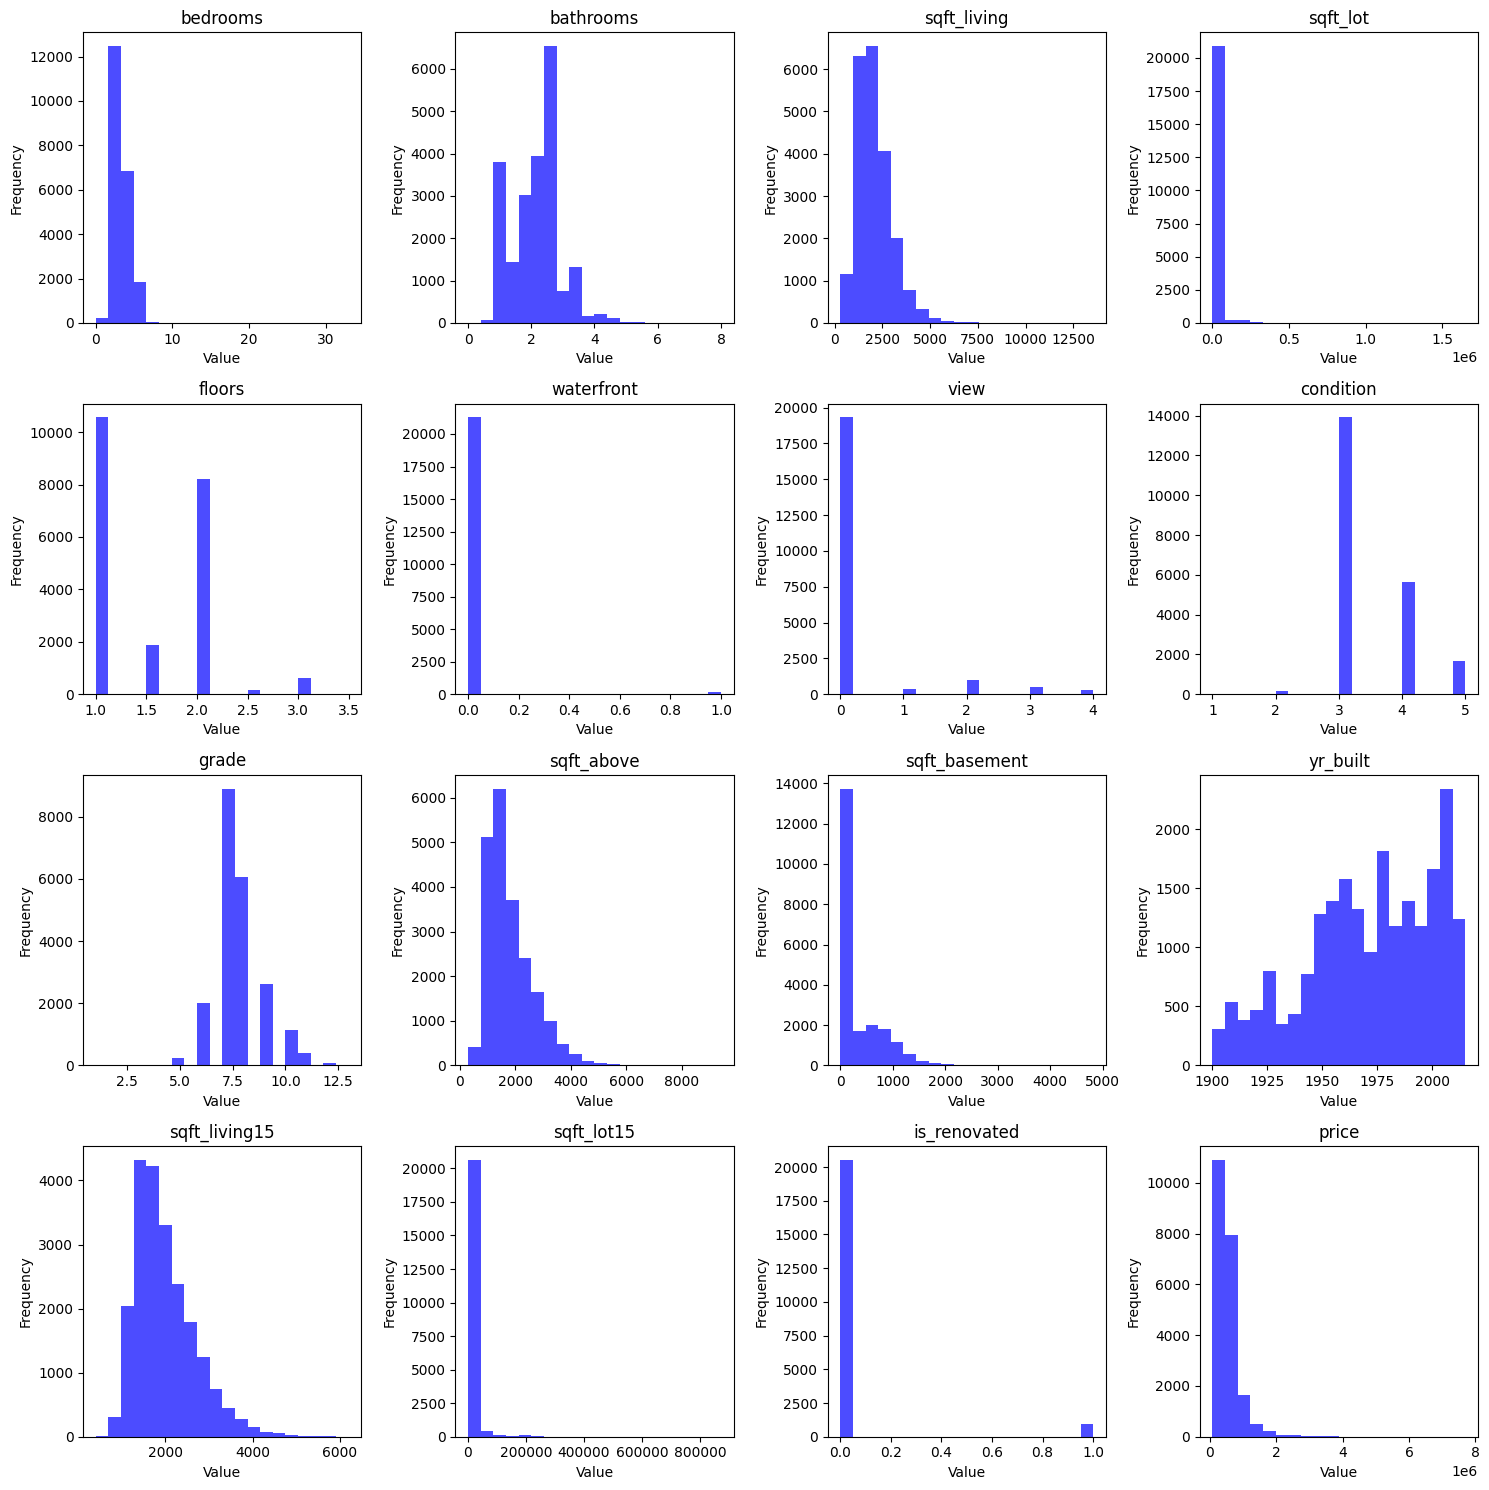

In [13]:
# Calculate the number of rows and columns for the subplot grid
num_rows = 4
num_cols = 4

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axs array so you can iterate through it using a single index
axs = axs.flatten()

# Create histograms for each variable
for i, column_name in enumerate(df.columns):
    axs[i].hist(df[column_name], bins=20, color='blue', alpha=0.7)
    axs[i].set_title(column_name)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


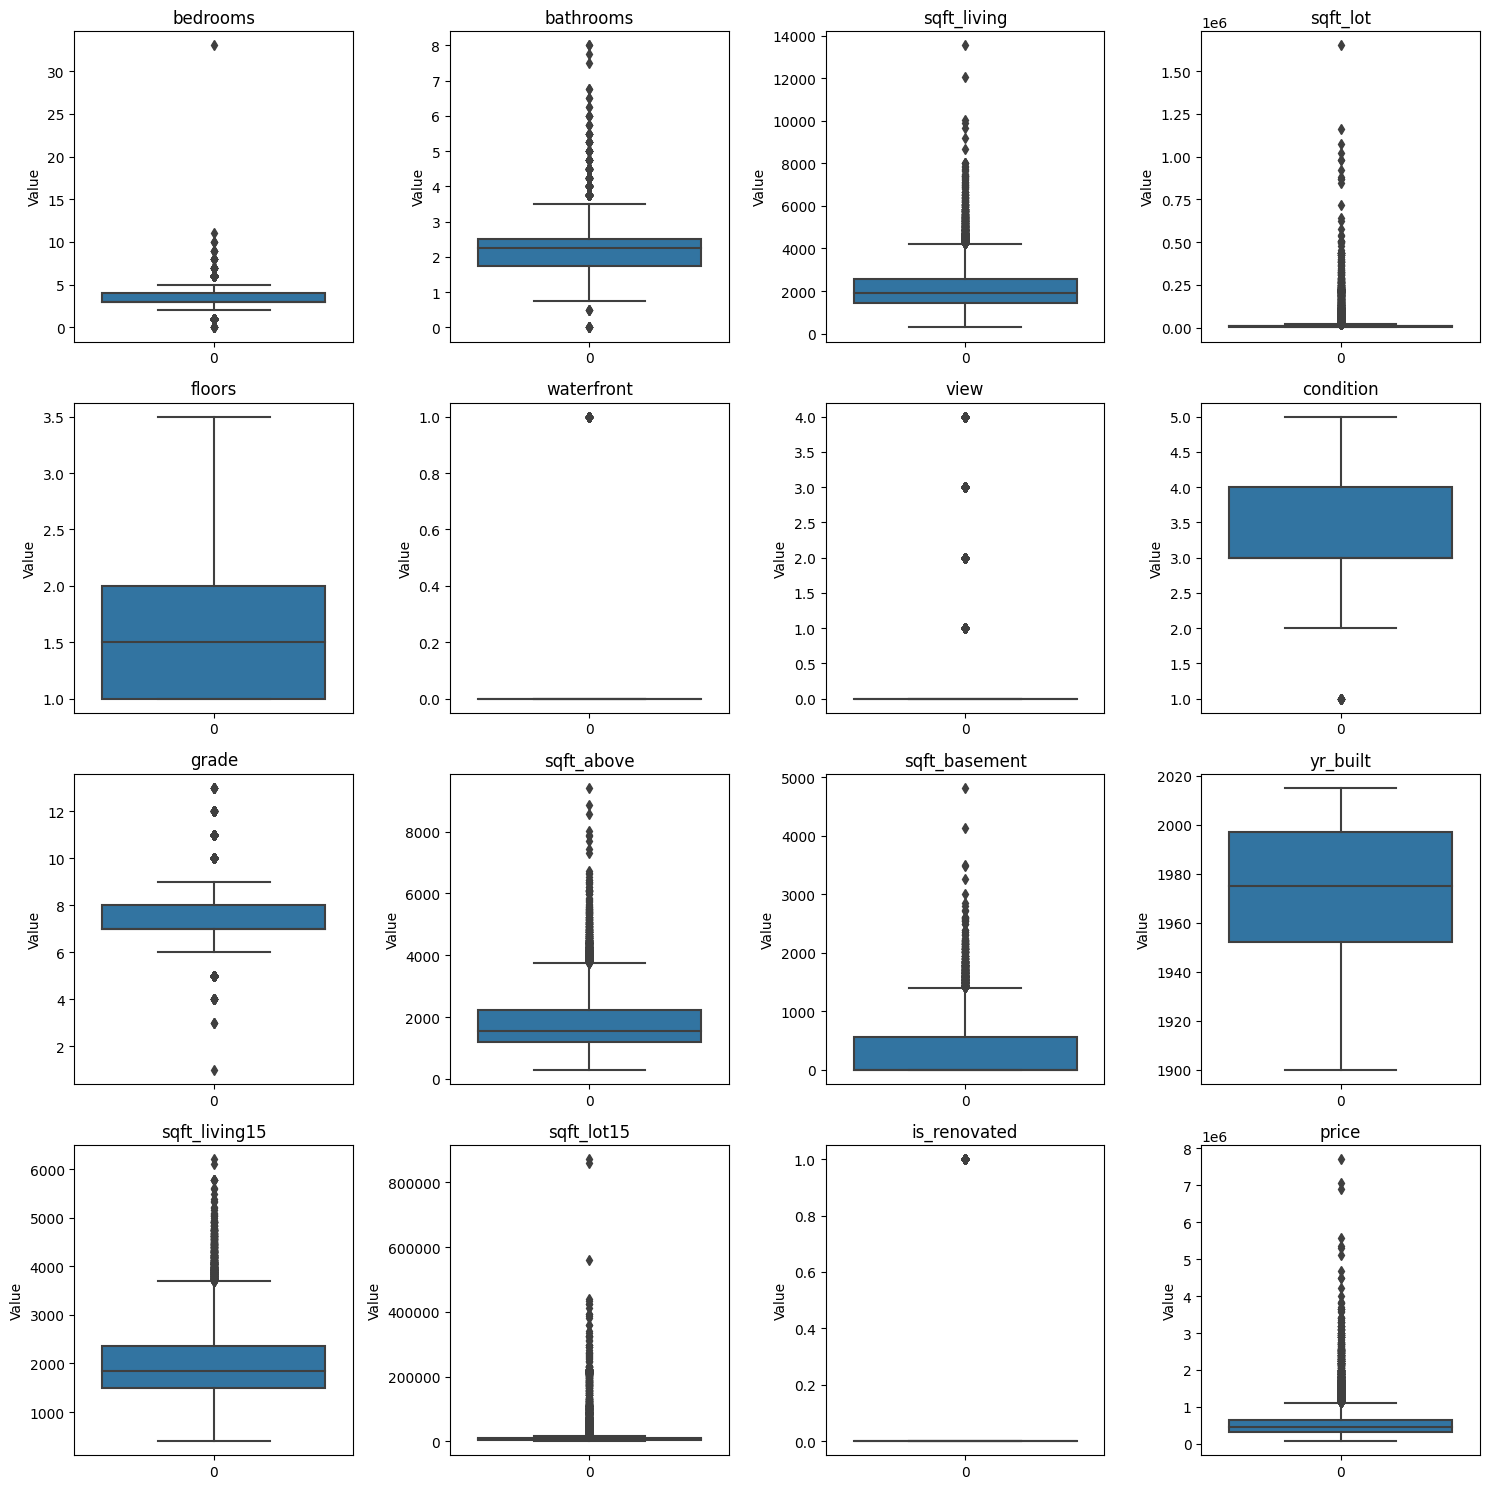

In [14]:
# Calculate the number of rows and columns for the subplot grid
num_rows = 4
num_cols = 4

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axs array so you can iterate through it using a single index
axs = axs.flatten()

# Create outlier plots (box plots or violin plots) for each variable
for i, column_name in enumerate(df.columns):
    sns.boxplot(data=df[column_name], ax=axs[i])
    axs[i].set_title(column_name)
    axs[i].set_ylabel('Value')

# Adjust layout
plt.tight_layout()
plt.show()


## **Modelling**

### **Label Encoding**

In [15]:
df_num = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15','price']]
df_WF = pd.get_dummies(df['waterfront'], prefix='waterfront')
df_RW = pd.get_dummies(df['is_renovated'], prefix='is_renovated')
df_CN = pd.get_dummies(df['condition'], prefix='condition')
df_RW = pd.get_dummies(df['view'], prefix='view')
df_FL = pd.get_dummies(df['floors'], prefix='floors')
df = pd.concat([df_num, df_WF, df_RW, df_CN, df_RW, df_FL], axis=1, join='inner')
label_col = 'price'
df

,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,...,view_1,view_2,view_3,view_4,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,3,1.00,1180,5650,7,1180,0,1955,1340,5650,...,0,0,0,0,1,0,0,0,0,0
1,3,2.25,2570,7242,7,2170,400,1951,1690,7639,...,0,0,0,0,0,0,1,0,0,0
2,2,1.00,770,10000,6,770,0,1933,2720,8062,...,0,0,0,0,1,0,0,0,0,0
3,4,3.00,1960,5000,7,1050,910,1965,1360,5000,...,0,0,0,0,1,0,0,0,0,0
4,3,2.00,1680,8080,8,1680,0,1987,1800,7503,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21431,3,2.50,1530,1131,8,1530,0,2009,1530,1509,...,0,0,0,0,0,0,0,0,1,0
21432,4,2.50,2310,5813,8,2310,0,2014,1830,7200,...,0,0,0,0,0,0,1,0,0,0
21433,2,0.75,1020,1350,7,1020,0,2009,1020,2007,...,0,0,0,0,0,0,1,0,0,0
21434,3,2.50,1600,2388,8,1600,0,2004,1410,1287,...,0,0,0,0,0,0,1,0,0,0


In [16]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'price', 'waterfront_0', 'waterfront_1', 'view_0',
       'view_1', 'view_2', 'view_3', 'view_4', 'condition_1', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'view_0', 'view_1',
       'view_2', 'view_3', 'view_4', 'floors_1.0', 'floors_1.5', 'floors_2.0',
       'floors_2.5', 'floors_3.0', 'floors_3.5'],
      dtype='object')

### **Split the dataset**

In [17]:
train_size, test_size = (0.7, 0.3)
df_train, df_test = train_test_split(df,
                                      test_size = test_size,
                                      random_state = 123)

### **Select Independent and Dependent Variables**

In [18]:
df_y_train = df_train[[label_col]]
df_x_train = df_train.drop(label_col, axis=1)
df_y_test = df_test[[label_col]]
df_x_test = df_test.drop(label_col, axis=1)

print('Size of training set: ', len(df_x_train))
print('Size of test set: ', len(df_x_test))

Size of training set:  15005
Size of test set:  6431


### **Scale the data using "MinMax" scaler**



*   Here, I used MinMax scaler to get all the variable data into a same scale. Scaling these values using MinMaxScaler ensures that the values are within a fixed range and contributes equally to the analysis



In [19]:
scaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_x_train)

df_x_train = pd.DataFrame(scaler.transform(df_x_train),
                            columns = df_x_train.columns, index = df_x_train.index)
df_x_test = pd.DataFrame(scaler.transform(df_x_test),
                            columns = df_x_test.columns, index = df_x_test.index)

print('X train min =', round(df_x_train.min().min(),4), '; max =', round(df_x_train.max().max(), 4))
print('X test min =', round(df_x_test.min().min(),4), '; max =', round(df_x_test.max().max(), 4))

X train min = 0.0 ; max = 1.0
X test min = -0.2 ; max = 3.0


### **01) Linear Regression Model**

### **Convert Pandas dataframe into numpy array**

In [20]:
arr_x_train = np.array(df_x_train)
arr_y_train = np.array(df_y_train)
arr_x_test = np.array(df_x_test)
arr_y_test = np.array(df_y_test)

print('Training shape:', arr_x_train.shape)
print('Training samples: ', arr_x_train.shape[0])
print('Testing samples: ', arr_x_test.shape[0])

Training shape: (15005, 33)
Training samples:  15005
Testing samples:  6431


In [21]:
# Create a linear regression model
model_lr = LinearRegression()

# Train the model on the training data
model_lr.fit(arr_x_train, arr_y_train)

# Make predictions on the test data
y_pred = model_lr.predict(arr_x_test)

# Calculate the mean squared error
mse = mean_squared_error(arr_y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 45815668513.09734


In [23]:
# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 214045.94953676965


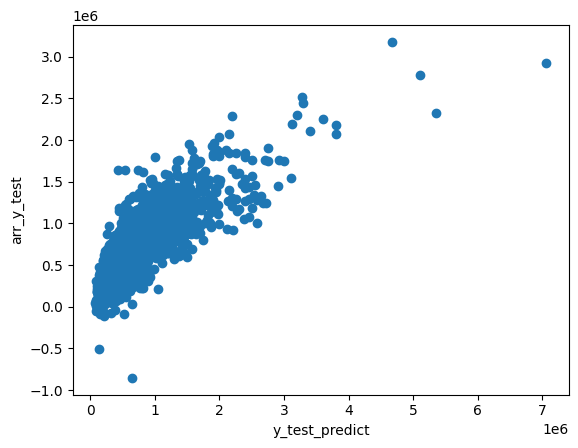

The Correlation between true and predicted values is:  0.812


In [24]:
y_test_predict = model_lr.predict(arr_x_test)
plt.scatter(arr_y_test, y_pred)
plt.ylabel('arr_y_test')
plt.xlabel('y_test_predict')
plt.show()

corr_result = np.corrcoef(arr_y_test.reshape(1,6431)[0], y_pred.reshape(1,6431)[0])
print('The Correlation between true and predicted values is: ',round(corr_result[0,1],3))

The linear regression model was trained and evaluated to predict house prices using the provided dataset. The model was initialized and trained using the training data, and subsequently, its predictive capabilities were assessed on the test data. The model's performance was evaluated using multiple metrics. The Root Mean Squared Error (RMSE) was calculated to be approximately 214045.95. This metric quantifies the average magnitude of the differences between the predicted house prices and the actual values in the test data. A lower RMSE suggests that the model's predictions are closer to the true values, indicating better predictive performance. Additionally, the correlation between the true and predicted values was found to be 0.812. This correlation value indicates a strong positive linear relationship between the model's predictions and the actual house prices. A higher correlation signifies that the model captures a significant portion of the variance in the target variable, reinforcing its reliability in predicting house prices. These results collectively suggest that the linear regression model demonstrates a promising ability to predict house prices, with a reasonably low RMSE and a strong correlation, implying its potential utility in real-world applications such as property valuation and market analysis.

### **02) Deep Learning Model - Keras**

*First Keras Model: Consisting of two layers and `Adam` optimizer.*

In [25]:
def basic_model_1(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="relu", input_shape=(x_size,)))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer=RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-07, weight_decay=0.0),
        metrics=[metrics.mae])
    return(t_model)

*Second Keras Model: with `RMSProp` optimizer consists of 4 layers and the first uses 20% dropouts.*

In [26]:
def basic_model_2(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(180, activation="relu"))
    t_model.add(Dense(20, activation="relu"))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer=RMSprop(learning_rate=0.005, rho=0.9, momentum=0.0, epsilon=1e-07, weight_decay=0.0,),
        metrics=[metrics.mae])
    return(t_model)

**Results based on Model 01**

In [27]:
model_1 = basic_model_1(arr_x_train.shape[1], arr_y_train.shape[1])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3400      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 3,501
Trainable params: 3,501
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model_1.fit(arr_x_train, arr_y_train,
    batch_size=64,
    epochs=100,
    shuffle=True,
    verbose=2,
    validation_data=(arr_x_test, arr_y_test))

Epoch 1/100
235/235 - 2s - loss: 430072463360.0000 - mean_absolute_error: 542890.5000 - val_loss: 425003909120.0000 - val_mean_absolute_error: 539001.4375 - 2s/epoch - 7ms/step
Epoch 2/100
235/235 - 0s - loss: 430005714944.0000 - mean_absolute_error: 542830.3125 - val_loss: 424910323712.0000 - val_mean_absolute_error: 538916.6250 - 475ms/epoch - 2ms/step
Epoch 3/100
235/235 - 1s - loss: 429884375040.0000 - mean_absolute_error: 542721.3125 - val_loss: 424763326464.0000 - val_mean_absolute_error: 538783.4375 - 516ms/epoch - 2ms/step
Epoch 4/100
235/235 - 0s - loss: 429709950976.0000 - mean_absolute_error: 542564.0625 - val_loss: 424563113984.0000 - val_mean_absolute_error: 538602.2500 - 466ms/epoch - 2ms/step
Epoch 5/100
235/235 - 1s - loss: 429479821312.0000 - mean_absolute_error: 542357.9375 - val_loss: 424308539392.0000 - val_mean_absolute_error: 538371.6250 - 507ms/epoch - 2ms/step
Epoch 6/100
235/235 - 0s - loss: 429197852672.0000 - mean_absolute_error: 542102.8125 - val_loss: 42400

In [29]:
train_score = model_1.evaluate(arr_x_train, arr_y_train, verbose=0)
test_score = model_1.evaluate(arr_x_test, arr_y_test, verbose=0)

print('Train MAE: ', round(train_score[1], 2), ', Train Loss: ', round(train_score[0], 2))
print('TEst MAE: ', round(test_score[1], 2), ', Test Loss: ', round(test_score[0], 2))

Train MAE:  305399.38 , Train Loss:  219892170752.0
TEst MAE:  302112.38 , Test Loss:  216763695104.0


201/201 [==============================] - 0s 1ms/step


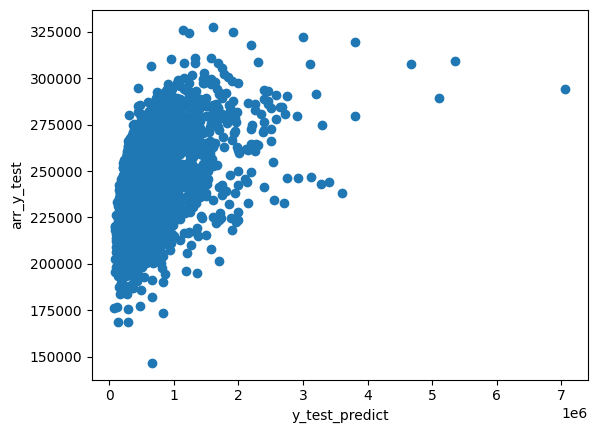

The Correlation between true and predicted values is:  0.447


In [30]:
y_test_predict = model_1.predict(arr_x_test)
plt.scatter(arr_y_test, y_test_predict)
plt.ylabel('arr_y_test')
plt.xlabel('y_test_predict')
plt.show()

corr_result = np.corrcoef(arr_y_test.reshape(1,6431)[0], y_test_predict.reshape(1,6431)[0])
print('The Correlation between true and predicted values is: ',round(corr_result[0,1],3))

In [33]:
# Calculate the mean squared error
mse = mean_squared_error(arr_y_test, y_test_predict)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 216763633800.68573
Root Mean Squared Error: 465578.8158847927


In [31]:
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Testing '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Testing'], loc='upper left')
        plt.draw()
        plt.show()

    return

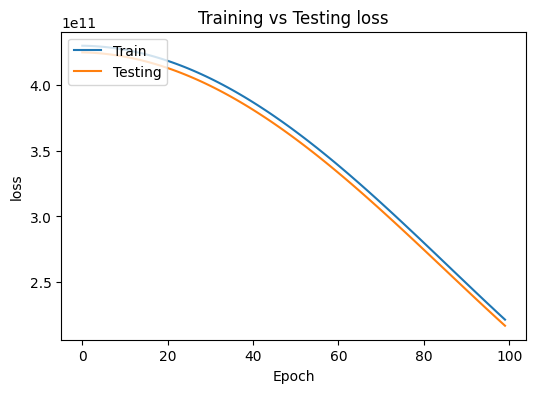

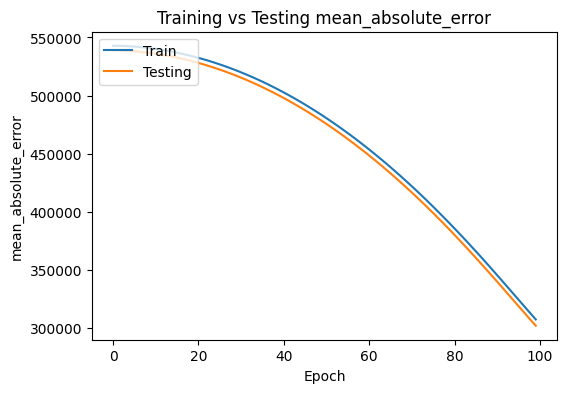

In [32]:
hist = pd.DataFrame(history.history)

# Plot history
plot_hist(hist, xsize=6, ysize=4)

Let's compare the results of the previous linear regression (LR) model with the Keras model based on the provided metrics:


**Previous Linear Regression (LR) Model:**
- Mean Squared Error (MSE): 45815668513.09734
- Root Mean Squared Error (RMSE): 214045.94953676965
- Correlation: 0.812

**Keras Model:**
- Mean Squared Error (MSE): 216763633800.68573
- Root Mean Squared Error (RMSE): 465578.8158847927
- Correlation: 0.447

Based on the comparison of these metrics:

1. **MSE and RMSE Comparison:**
   The LR model had a substantially lower MSE and RMSE compared to the Keras model. A lower MSE and RMSE indicate better predictive accuracy, with the LR model outperforming the Keras model in this regard. The LR model's predictions were closer to the actual values compared to the Keras model.

2. **Correlation Comparison:**
   The LR model exhibited a significantly higher correlation between the true and predicted values (0.812) than the Keras model (0.447). A higher correlation suggests a stronger linear relationship between the predictions and actual values. The LR model's better correlation implies that it captured more of the underlying patterns in the data.

Given the provided results and metrics, the previous Linear Regression model appears to be the better choice for predicting house prices compared to the new Keras model. The LR model displayed lower MSE and RMSE values, indicating superior predictive accuracy, and it had a higher correlation, implying a stronger relationship between predictions and actual values.

**Results based on Model 02**

In [34]:
model_2 = basic_model_2(arr_x_train.shape[1], arr_y_train.shape[1])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               3400      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 180)               18180     
                                                                 
 dense_4 (Dense)             (None, 20)                3620      
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 25,221
Trainable params: 25,221
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model_2.fit(arr_x_train, arr_y_train,
    batch_size=64,
    epochs=100,
    shuffle=True,
    verbose=2,
    validation_data=(arr_x_test, arr_y_test))

Epoch 1/100
235/235 - 2s - loss: 327975665664.0000 - mean_absolute_error: 429103.9688 - val_loss: 155585380352.0000 - val_mean_absolute_error: 226289.9531 - 2s/epoch - 7ms/step
Epoch 2/100
235/235 - 1s - loss: 119002734592.0000 - mean_absolute_error: 207589.6094 - val_loss: 89487630336.0000 - val_mean_absolute_error: 169686.1250 - 634ms/epoch - 3ms/step
Epoch 3/100
235/235 - 1s - loss: 77312720896.0000 - mean_absolute_error: 163815.5312 - val_loss: 71128891392.0000 - val_mean_absolute_error: 152026.9062 - 644ms/epoch - 3ms/step
Epoch 4/100
235/235 - 1s - loss: 64126955520.0000 - mean_absolute_error: 150819.9375 - val_loss: 59556200448.0000 - val_mean_absolute_error: 145536.1719 - 819ms/epoch - 3ms/step
Epoch 5/100
235/235 - 1s - loss: 59731111936.0000 - mean_absolute_error: 149126.5625 - val_loss: 54602944512.0000 - val_mean_absolute_error: 138583.8281 - 948ms/epoch - 4ms/step
Epoch 6/100
235/235 - 1s - loss: 55982104576.0000 - mean_absolute_error: 147143.4375 - val_loss: 53699567616.0

In [36]:
train_score = model_2.evaluate(arr_x_train, arr_y_train, verbose=0)
test_score = model_2.evaluate(arr_x_test, arr_y_test, verbose=0)

print('Train MAE: ', round(train_score[1], 2), ', Train Loss: ', round(train_score[0], 2))
print('TEst MAE: ', round(test_score[1], 2), ', Test Loss: ', round(test_score[0], 2))

Train MAE:  121480.18 , Train Loss:  33561729024.0
TEst MAE:  123090.54 , Test Loss:  37167673344.0


201/201 [==============================] - 0s 1ms/step


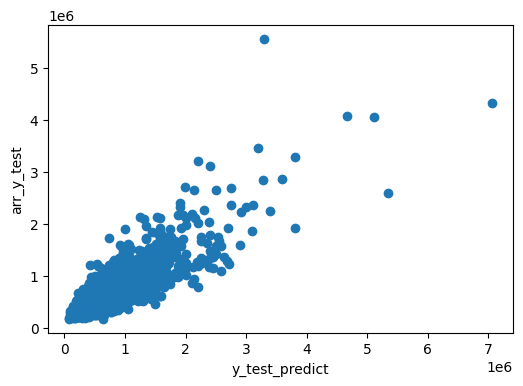

The Correlation between true and predicted values is:  0.855


In [37]:
y_test_predict = model_2.predict(arr_x_test)
plt.scatter(arr_y_test, y_test_predict)
plt.ylabel('arr_y_test')
plt.xlabel('y_test_predict')
plt.show()

corr_result = np.corrcoef(arr_y_test.reshape(1,6431)[0], y_test_predict.reshape(1,6431)[0])
print('The Correlation between true and predicted values is: ',round(corr_result[0,1],3))

In [38]:
# Calculate the mean squared error
mse = mean_squared_error(arr_y_test, y_test_predict)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 37167669951.88608
Root Mean Squared Error: 192789.18525655445


In [39]:
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Testing '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Testing'], loc='upper left')
        plt.draw()
        plt.show()

    return

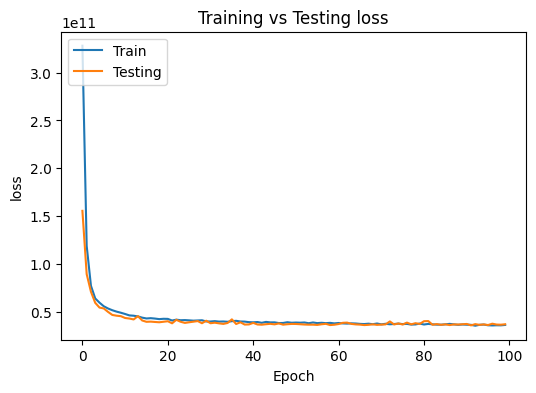

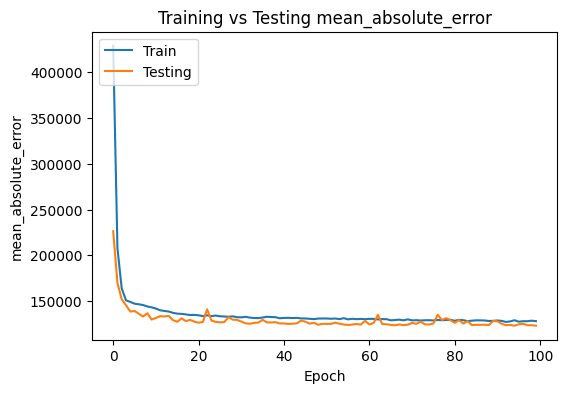

In [40]:
hist = pd.DataFrame(history.history)

# Plot history
plot_hist(hist, xsize=6, ysize=4)

Comparing the results of the two models, the Linear Regression (LR) model and the new Keras model, provides valuable insights into their respective performance for predicting house prices.

The previous Linear Regression (LR) model yielded a Mean Squared Error (MSE) of approximately 45815668513.10 and a Root Mean Squared Error (RMSE) of 214045.95. The correlation between the true and predicted values was 0.812. On the other hand, the new Keras model produced a lower MSE of about 37167669951.89, a lower RMSE of 192789.19, and an improved correlation of 0.855.

These results suggest that the Keras model outperforms the Linear Regression model in terms of predictive accuracy. The lower MSE and RMSE values indicate that the Keras model's predictions are closer to the actual house prices, implying better model fit. Additionally, the higher correlation signifies a stronger linear relationship between the Keras model's predictions and the true house prices, indicating a more accurate representation of the underlying data patterns.

Based on these results, the **Keras model** appears to be the better choice for predicting house prices compared to the Linear Regression model. Its improved accuracy, as reflected in the lower MSE and RMSE values along with the higher correlation, suggests that the Keras model captures more nuances in the data and has a better generalization capability.